In [20]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('data/twitter_historical.csv')

In [7]:
df.head()

,Tweet Id,Text,Username,sentiment_prediction,Followers,User Favourites,Location,Friends,date,week,Retweets,Tweet Likes,Tweet Replies
0,1408192134365151232,Remember when VicGov got blasted for listing t...,toiletpaperaus1,negative,311.0,203.0,NaN,20.0,2021-06-24 22:35:42+00:00,77,2.0,21.0,1.0
1,1408162433252794373,A US tourist has rated Australia’s leading sup...,7NewsSydney,negative,345387.0,8715.0,Sydney,176.0,2021-06-24 20:37:41+00:00,77,0.0,3.0,2.0
2,1408162407923425284,A US tourist has rated Australia’s leading sup...,7NewsAustralia,negative,198672.0,627.0,Australia,187.0,2021-06-24 20:37:35+00:00,77,0.0,3.0,13.0
3,1408053912708390913,Public #Health alert - more venues of concern ...,MirageNewsCom,neutral,338.0,0.0,Australia,16.0,2021-06-24 13:26:27+00:00,77,0.0,0.0,0.0
4,1408025127791386626,Woolworths shares drop as Endeavour pubs busin...,Zicutake,negative,2010.0,21435.0,NaN,0.0,2021-06-24 11:32:04+00:00,77,0.0,0.0,0.0


In [12]:
for col in ['Followers', 'User Favourites','Retweets','Tweet Likes','Tweet Replies']:
    df[col]=(df[col]-df[col].mean())/df[col].std()

In [14]:
df.head()

,Tweet Id,Text,Username,sentiment_prediction,Followers,User Favourites,Location,Friends,date,week,Retweets,Tweet Likes,Tweet Replies
0,1408192134365151232,Remember when VicGov got blasted for listing t...,toiletpaperaus1,negative,-0.053917,-0.418328,NaN,20.0,2021-06-24 22:35:42+00:00,77,0.051532,0.477598,0.054413
1,1408162433252794373,A US tourist has rated Australia’s leading sup...,7NewsSydney,negative,0.463447,-0.254669,Sydney,176.0,2021-06-24 20:37:41+00:00,77,-0.112644,-0.048201,0.277147
2,1408162407923425284,A US tourist has rated Australia’s leading sup...,7NewsAustralia,negative,0.243481,-0.410176,Australia,187.0,2021-06-24 20:37:35+00:00,77,-0.112644,-0.048201,2.727224
3,1408053912708390913,Public #Health alert - more venues of concern ...,MirageNewsCom,neutral,-0.053876,-0.422231,Australia,16.0,2021-06-24 13:26:27+00:00,77,-0.112644,-0.135834,-0.168322
4,1408025127791386626,Woolworths shares drop as Endeavour pubs busin...,Zicutake,negative,-0.051370,-0.010104,NaN,0.0,2021-06-24 11:32:04+00:00,77,-0.112644,-0.135834,-0.168322


In [15]:
df['sum'] = df['Followers']+df['User Favourites']+df['Retweets']+df['Tweet Likes']+df['Tweet Replies']

In [16]:
df.head()

,Tweet Id,Text,Username,sentiment_prediction,Followers,User Favourites,Location,Friends,date,week,Retweets,Tweet Likes,Tweet Replies,sum
0,1408192134365151232,Remember when VicGov got blasted for listing t...,toiletpaperaus1,negative,-0.053917,-0.418328,NaN,20.0,2021-06-24 22:35:42+00:00,77,0.051532,0.477598,0.054413,0.111296
1,1408162433252794373,A US tourist has rated Australia’s leading sup...,7NewsSydney,negative,0.463447,-0.254669,Sydney,176.0,2021-06-24 20:37:41+00:00,77,-0.112644,-0.048201,0.277147,0.325079
2,1408162407923425284,A US tourist has rated Australia’s leading sup...,7NewsAustralia,negative,0.243481,-0.410176,Australia,187.0,2021-06-24 20:37:35+00:00,77,-0.112644,-0.048201,2.727224,2.399683
3,1408053912708390913,Public #Health alert - more venues of concern ...,MirageNewsCom,neutral,-0.053876,-0.422231,Australia,16.0,2021-06-24 13:26:27+00:00,77,-0.112644,-0.135834,-0.168322,-0.892908
4,1408025127791386626,Woolworths shares drop as Endeavour pubs busin...,Zicutake,negative,-0.051370,-0.010104,NaN,0.0,2021-06-24 11:32:04+00:00,77,-0.112644,-0.135834,-0.168322,-0.478273


In [37]:
top = df.sort_values(by=['sum'],ascending=False).iloc()[0:1000]['sentiment_prediction'].value_counts()

In [24]:
print(df.iloc()[3850]['Text'])

Australia's largest businesses are allowed to remain open during #Stage4 lockdowns. #Woolworths #Coles #DanMurphys #Bunnings #Maccas - but screw any family run business.

This is an abuse of government power. #DanAndrews may as well nail the foreclosure signs on the door himself.


In [38]:
res_vec=[top['negative']]+[top['neutral']]+[top['positive']]

<BarContainer object of 3 artists>

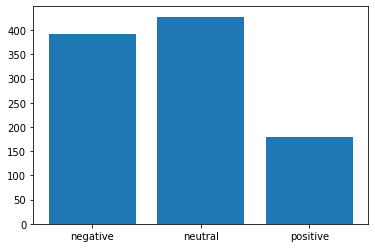

In [39]:
plt.bar(['negative','neutral','positive'],res_vec)